In [1]:
import time
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data1=[]
data2=[]
날짜=[]
data3=[]
종가=[]
data4=[]
고가=[]
저가=[]
시가=[]
in_data=[]

b=webdriver.Chrome()
b.get("https://naver.com")
time.sleep(1)
b.find_element_by_xpath('//*[@id="NM_FAVORITE"]/div[1]/ul[2]/li[3]/a').click()
time.sleep(1)
b.find_element_by_xpath('//*[@id="stock_items"]').send_keys("삼성전자\n")
time.sleep(2)
b.find_element_by_xpath('//*[@id="content"]/div[4]/table/tbody/tr[1]/td[1]/a').click()
time.sleep(1)
b.execute_script("window.scrollTo(0, document.body.scrollHeight)")
time.sleep(1)
b.find_element_by_xpath('//*[@id="content"]/ul/li[2]/a/span').click()
time.sleep(2)
b.execute_script("window.scrollTo(0, document.body.scrollHeight)")
time.sleep(1)
frame=b.find_element_by_xpath('//*[@id="content"]/div[2]/iframe[2]')
b.switch_to.frame(frame)
#리스트에 저장
for i in range(2,7):
    time.sleep(2)
    b.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    b.implicitly_wait(10)
    html = b.page_source
    b.implicitly_wait(10)
    if i ==2:
        b.find_element_by_xpath(f'/html/body/table[2]/tbody/tr/td[{i}]/a').click()
        b.implicitly_wait(10)
    elif i !=2:
        b.find_element_by_xpath(f'/html/body/table[2]/tbody/tr/td[{i+1}]/a').click()
        b.implicitly_wait(10)
    s=BeautifulSoup(html,'html.parser')
    b.implicitly_wait(10)
    data1 = s.find_all('td', attrs={"align": "center"})
    data2 = s.find_all('td', attrs={"class": "num"})

    for i in data1:
        날짜.append(i.span.text)
    for i in data2:
        data3.append(i.span.text.strip())

#현재가,전일대비,등락율 분리
for i in range(len(data3)//6):
    종가.append(data3[i*6])
    data4.append(data3[i*6+2])
    고가.append(data3[i*6+3])
    저가.append(data3[i*6+4])
for i in range(len(data4)):
    시가.append(data4[i].replace("\n\t\t\t\t",""))



In [3]:
in_data = list(zip(날짜,종가,시가,고가,저가))
in_data.reverse()
df = pd.DataFrame(in_data, columns=["날짜","종가","시가","고가","저가"])
df.to_excel('PHJ.xlsx', index=False)


In [4]:
df=pd.read_excel('PHJ.xlsx')
df

,날짜,종가,시가,고가,저가
0,2022.01.26,"73,300","73,900","74,400","73,100"
1,2022.01.27,"71,300","73,800","74,000","71,300"
2,2022.01.28,"73,300","71,300","73,700","71,200"
3,2022.02.03,"73,300","74,900","74,900","73,300"
4,2022.02.04,"74,000","74,300","74,600","73,400"
5,2022.02.07,"73,000","73,500","73,600","72,400"
6,2022.02.08,"73,500","73,800","74,200","73,000"
7,2022.02.09,"74,700","74,300","74,700","74,000"
8,2022.02.10,"75,400","75,600","75,800","74,700"
9,2022.02.11,"74,900","75,000","75,500","74,600"


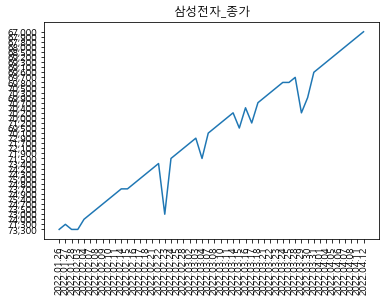

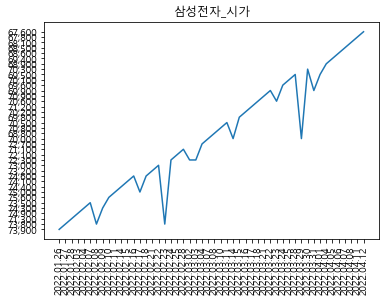

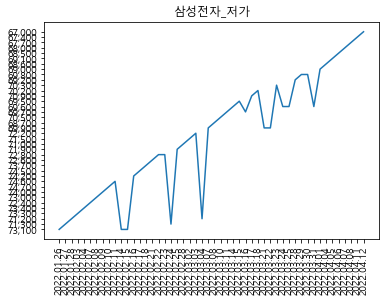

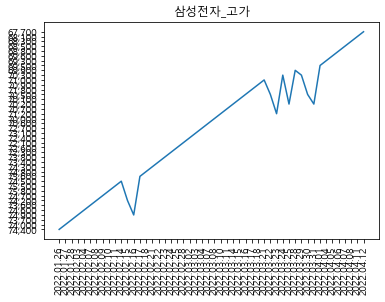

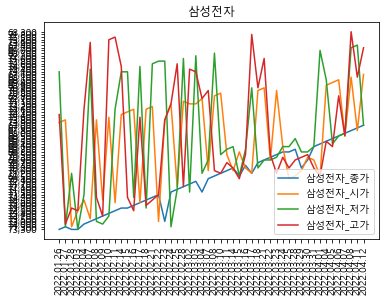

In [5]:
plt.plot(df.날짜,df.종가)
plt.title('삼성전자_종가')
plt.xticks(rotation=90)
plt.show()
plt.plot(df.날짜,df.시가)
plt.title('삼성전자_시가')
plt.xticks(rotation=90)
plt.show()
plt.plot(df.날짜,df.저가)
plt.title('삼성전자_저가')
plt.xticks(rotation=90)
plt.show()
plt.plot(df.날짜,df.고가)
plt.title('삼성전자_고가')
plt.xticks(rotation=90)
plt.show()
plt.plot(df.날짜,df.종가,label='삼성전자_종가')
plt.plot(df.날짜,df.시가,label='삼성전자_시가')
plt.plot(df.날짜,df.저가,label='삼성전자_저가')
plt.plot(df.날짜,df.고가,label='삼성전자_고가')
plt.title('삼성전자')
plt.xticks(rotation=90)
plt.legend()
plt.show()